In [1]:
"""
Created on Mon June 13 10:37 2021

@author: Ken.Pryor
"""
import matplotlib.pyplot as plt
from skewt import SkewT
from six import StringIO
import numpy as np
import re

'''
Modified NOAA-20 NUCAPS Profile at 1946 UTC 27 April 2020 at position 29.5N/101.1W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 7 0 . 0"
temp = "2 0 8 . 6 4 0 6 2   2 1 6 . 6 8 7 5   2 2 5 . 2 0 3 1 2   2 3 2 . 8 4 3 7 5   2 3 8 . 8 9 0 6 2   2 4 7 . 2 3 4 3 8   2 5 6 . 1 0 9 3 8   2 6 2 . 5 7 8 1 2   2 6 5 . 5 4 6 8 8   2 6 5 . 9 2 1 8 8   2 6 2 . 9 2 1 8 8   2 5 9 . 4 2 1 8 8   2 5 5 . 7 6 5 6 2   2 5 1 . 9 5 3 1 2   2 4 7 . 7 9 6 8 8   2 4 3 . 0 7 8 1 2   2 3 8 . 6 7 1 8 8   2 3 4 . 4 8 4 3 8   2 3 0 . 9 6 8 7 5   2 2 8 . 5 6 2 5   2 2 6 . 6 4 0 6 2   2 2 5 . 0 6 2 5   2 2 3 . 7 8 1 2 5   2 2 2 . 7 8 1 2 5   2 2 1 . 8 5 9 3 8   2 2 1 . 1 0 9 3 8   2 2 0 . 0 4 6 8 8   2 1 8 . 8 5 9 3 8   2 1 7 . 7 5   2 1 6 . 7 8 1 2 5   2 1 5 . 8 2 8 1 2   2 1 4 . 8 5 9 3 8   2 1 3 . 8 1 2 5   2 1 2 . 6 0 9 3 8   2 1 1 . 3 1 2 5   2 0 9 . 7 6 5 6 2   2 0 8 . 2 9 6 8 8   2 0 7 . 0 6 2 5   2 0 6 . 1 2 5   2 0 5 . 6 5 6 2 5   2 0 5 . 0 9 3 7 5   2 0 4 . 4 3 7 5   2 0 4 . 2 5   2 0 4 . 4 0 6 2 5   2 0 4 . 9 2 1 8 8   2 0 5 . 6 5 6 2 5   2 0 6 . 4 8 4 3 8   2 0 7 . 5 1 5 6 2   2 0 8 . 7 8 1 2 5   2 1 0 . 2 1 8 7 5   2 1 1 . 7 1 8 7 5   2 1 3 . 2 1 8 7 5   2 1 4 . 5 9 3 7 5   2 1 5 . 9 6 8 7 5   2 1 7 . 2 8 1 2 5   2 1 8 . 7 3 4 3 8   2 2 0 . 3 7 5   2 2 2 . 3 5 9 3 8   2 2 4 . 5 9 3 7 5   2 2 6 . 8 1 2 5   2 2 9 . 0 7 8 1 2   2 3 1 . 3 2 8 1 2   2 3 3 . 6 0 9 3 8   2 3 5 . 8 9 0 6 2   2 3 8 . 3 5 9 3 8   2 4 0 . 8 4 3 7 5   2 4 3 . 3 1 2 5   2 4 5 . 7 8 1 2 5   2 4 8 . 2 1 8 7 5   2 5 0 . 6 4 0 6 2   2 5 3 . 0 9 3 7 5   2 5 5 . 5 3 1 2 5   2 5 7 . 9 3 7 5   2 6 0 . 2 5   2 6 2 . 6 5 6 2 5   2 6 5 . 0   2 6 7 . 2 3 4 3 8   2 6 9 . 3 9 0 6 2   2 7 1 . 6 2 5   2 7 4 . 0   2 7 6 . 4 3 7 5   2 7 8 . 3 9 0 6 2   2 7 9 . 8 1 2 5   2 8 0 . 2 6 5 6 2   2 8 2 . 0 6 2 5   2 8 4 . 0 6 2 5   2 8 6 . 6 5 6 2 5   2 8 8 . 7 8 1 2 5   2 9 0 . 7 3 4 3 8   2 9 2 . 9 0 6 2 5   2 9 5 . 2 8 1 2 5   2 9 8 . 0 3 1 2 5   2 9 9 . 3 9 0 6 2   3 0 1 . 2 8 1 2 5   3 0 2 . 5   3 0 5 . 1 5"
dewpt = "1 4 8 . 9 2 6 5 4   1 5 3 . 9 5 6 6 2   1 5 7 . 0 6 6 8 3   1 5 9 . 7 1 5 7   1 6 2 . 0 7 7 9 4   1 6 4 . 1 4 4 6 7   1 6 5 . 8 8 6 3   1 6 7 . 3 3 2 4 3   1 6 8 . 6 9 1 8 6   1 6 9 . 8 7 7 8 2   1 7 1 . 0 0 7 2 5   1 7 2 . 0 8 2 1 4   1 7 3 . 0 7 0 8 3   1 7 3 . 9 9 4 6 6   1 7 4 . 8 6 3 4 3   1 7 5 . 7 1 1 1 7   1 7 6 . 5 7 3 7 2   1 7 7 . 4 0 8 7 8   1 7 8 . 2 7 3 6   1 7 9 . 1 0 8 9 3   1 7 9 . 8 8 1 1 8   1 8 0 . 6 0 2 7   1 8 1 . 3 0 1 0 4   1 8 1 . 9 7 0 2 8   1 8 2 . 6 1 1   1 8 3 . 2 3 6 2 5   1 8 3 . 8 3 0 1 7   1 8 4 . 3 8 8 8 7   1 8 4 . 9 4 0 8 6   1 8 5 . 4 5 2 9 4   1 8 5 . 8 5 3 5   1 8 6 . 2 4 7 7 1   1 8 6 . 6 2 8 7 1   1 8 6 . 9 7 9 1   1 8 7 . 2 3 3 1 1   1 8 7 . 4 8 4 2 5   1 8 7 . 7 2 1 3 1   1 8 7 . 9 5 4 5 6   1 8 8 . 1 7 2 5 5   1 8 8 . 3 9 3 0 2   1 8 8 . 6 1 4 7 8   1 8 8 . 8 2 6 4 9   1 8 9 . 0 3 3 7 4   1 8 9 . 6 0 5 1 5   1 9 0 . 6 4 6 9 1   1 9 1 . 6 2 8 2 2   1 9 2 . 8 0 3 2 8   1 9 4 . 1 0 2 3 9   1 9 5 . 5 1 0 3 6   1 9 7 . 0 1 6 3 7   1 9 8 . 6 4 4 4 5   2 0 0 . 2 7 1 1   2 0 1 . 8 3 1 2 7   2 0 3 . 5 5 4 2 4   2 0 5 . 5 0 9 8 1   2 0 7 . 5 8 2 3 4   2 0 9 . 5 6 1 2 6   2 1 1 . 3 3 3 0 8   2 1 2 . 8 9 3 2   2 1 4 . 3 5 0 1 6   2 1 5 . 6 2 2 3   2 1 6 . 7 4 0 7 2   2 1 7 . 8 2 6 3 9   2 1 8 . 8 0 5 7 4   2 2 0 . 1 9 4 1 4   2 2 2 . 2 6 2 5   2 2 5 . 4 5 9 1   2 2 8 . 8 2 1 7 5   2 3 2 . 3 9 0 2 7   2 3 6 . 0 6 5 5 5   2 3 9 . 2 9 6 9 5   2 4 2 . 0 6 4 3 8   2 4 4 . 5 7 7 2 7   2 4 6 . 6 5 3 8 1   2 4 8 . 4 9 3 4 2   2 5 0 . 6 3 4 1 4   2 5 2 . 4 5 0 9 9   2 5 4 . 6 7 9 3 4   2 5 7 . 1 5 7 1 4   2 5 9 . 8 1 5 6 4   2 6 2 . 7 7 4 8   2 6 5 . 3 0 0 7 2   2 6 7 . 9 5 1 0 2   2 7 0 . 2 3 5 9 6   2 7 2 . 2 2 6 1   2 7 4 . 9 1 7 0 2   2 7 7 . 3 6 9 7 5   2 7 9 . 4 9 7 6   2 8 1 . 3 6 8 8 4   2 8 3 . 0 1 6 0 5   2 8 4 . 3 8 6 0 2   2 8 6 . 0 8 7 9 8   2 8 8 . 0 1 3 5 8   2 9 0 . 2 0 1 7 2   2 9 2 . 9 8 7 1   2 9 2 . 1 5"

print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)

data_txt = '''
0.3
0.5
0.75
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))

pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 970.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 2700
delta_zkm = 2.7
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)



0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:153: RuntimeWarning: invalid value encountered in sqrt


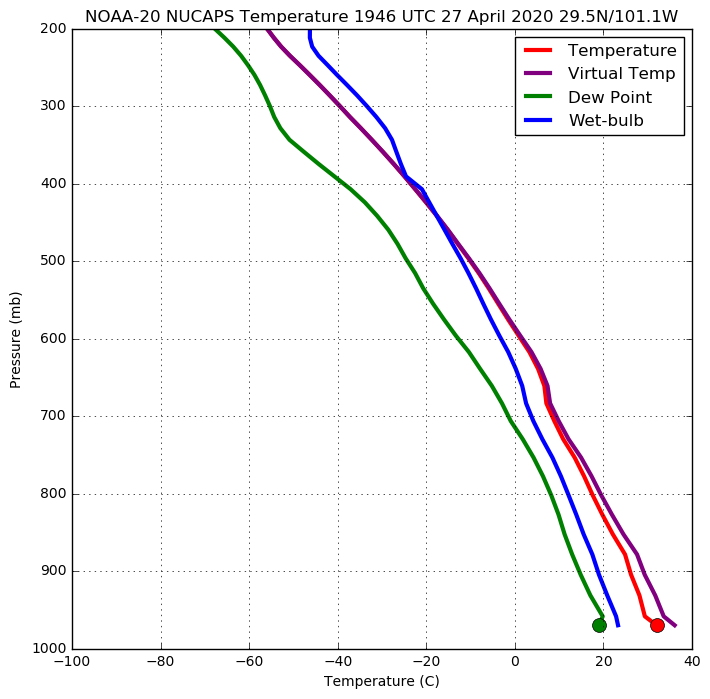

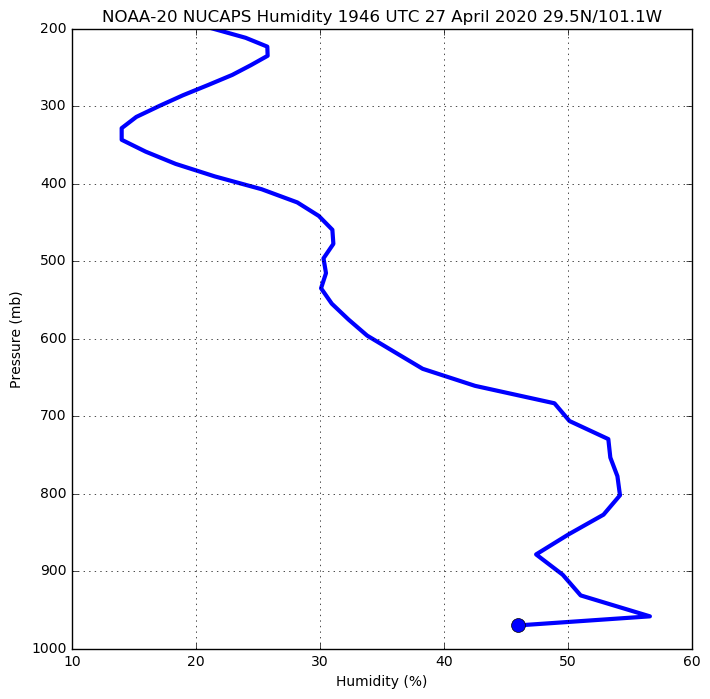

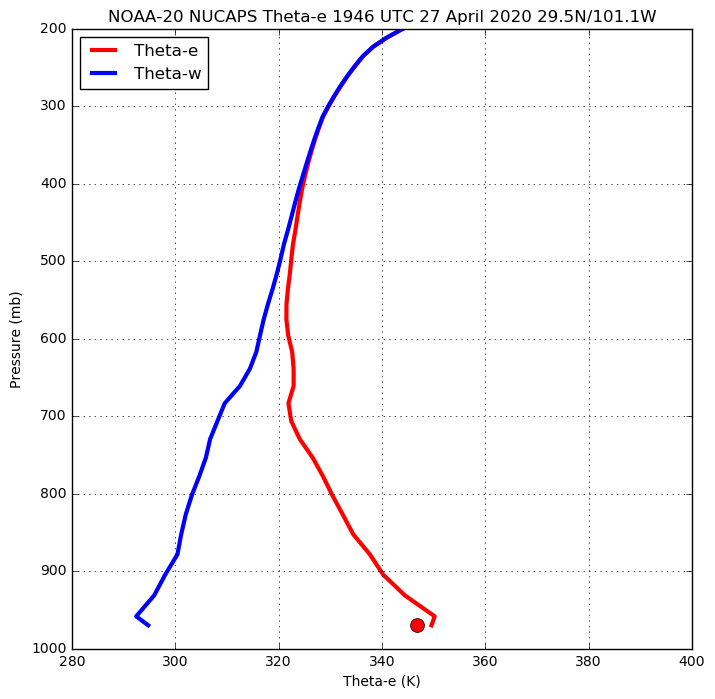

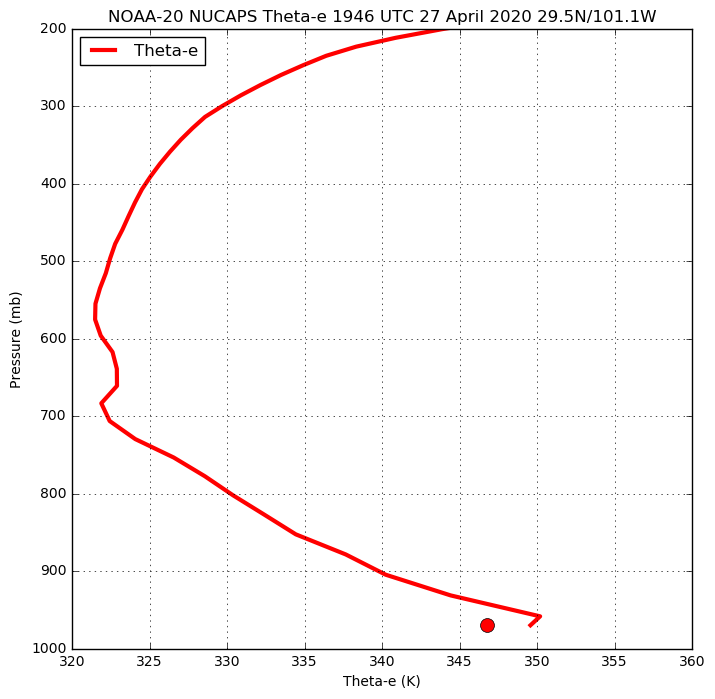

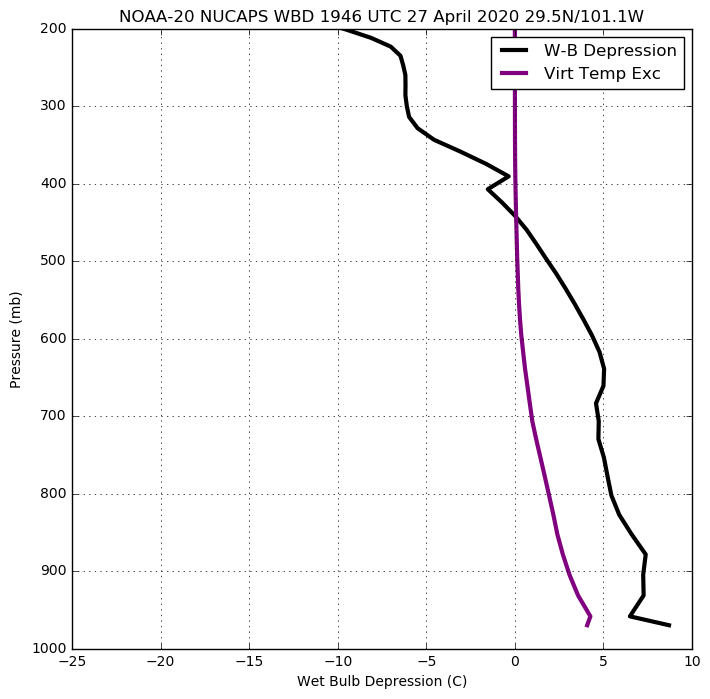

In [2]:
temperature_sfc = 32.0
dewpoint_sfc = 19.0
humidity_sfc = 46
pressure_sfc = 970
thetae_sfc = (273.15 + temperature_sfc)*((1000/pressure_sfc)**0.286)+(3 * (humidity_sfc * (3.884266 * 10**
         ((7.5 * temperature_sfc)/(237.7 + temperature_sfc)))/100))
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.plot(temperature_sfc,pressure_sfc,'ro',markersize=10)
plt.plot(dewpoint_sfc,pressure_sfc,'go',markersize=10)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("NOAA-20 NUCAPS Temperature 1946 UTC 27 April 2020 29.5N/101.1W")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("nucaps_temp_press_1946_mod.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.plot(humidity_sfc,pressure_sfc,'bo',markersize=10)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("NOAA-20 NUCAPS Humidity 1946 UTC 27 April 2020 29.5N/101.1W")
plt.grid(True)
plt.savefig("nucaps_humidity_press_1946_mod.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("NOAA-20 NUCAPS Theta-e 1946 UTC 27 April 2020 29.5N/101.1W")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("nucaps_thtae_press_1946_mod.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.xlim(320,360)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("NOAA-20 NUCAPS Theta-e 1946 UTC 27 April 2020 29.5N/101.1W")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("nucaps_thtae_1946_mod.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("NOAA-20 NUCAPS WBD 1946 UTC 27 April 2020 29.5N/101.1W")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("nucaps_wbd_press_1946_mod.png",dpi=250,bbox_inches='tight')
plt.show()

('PUP idx = ', (array([11]),))
('PLO idx = ', (array([0]),))

---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 958.5hPa
TCs :  29.4C
TDs :  19.8C
-------------
Plcl: 835.0hPa
Tlcl:  17.7C
Plfc: 765.2hPa
P_el: 168.7hPa
CAPE:3533.5J
CIN: -101.2J
(958.5, 29.350000000000023, 19.837100000000021, 'mu')
('CAPE = ', 3533.4809816645329)
Figure saved


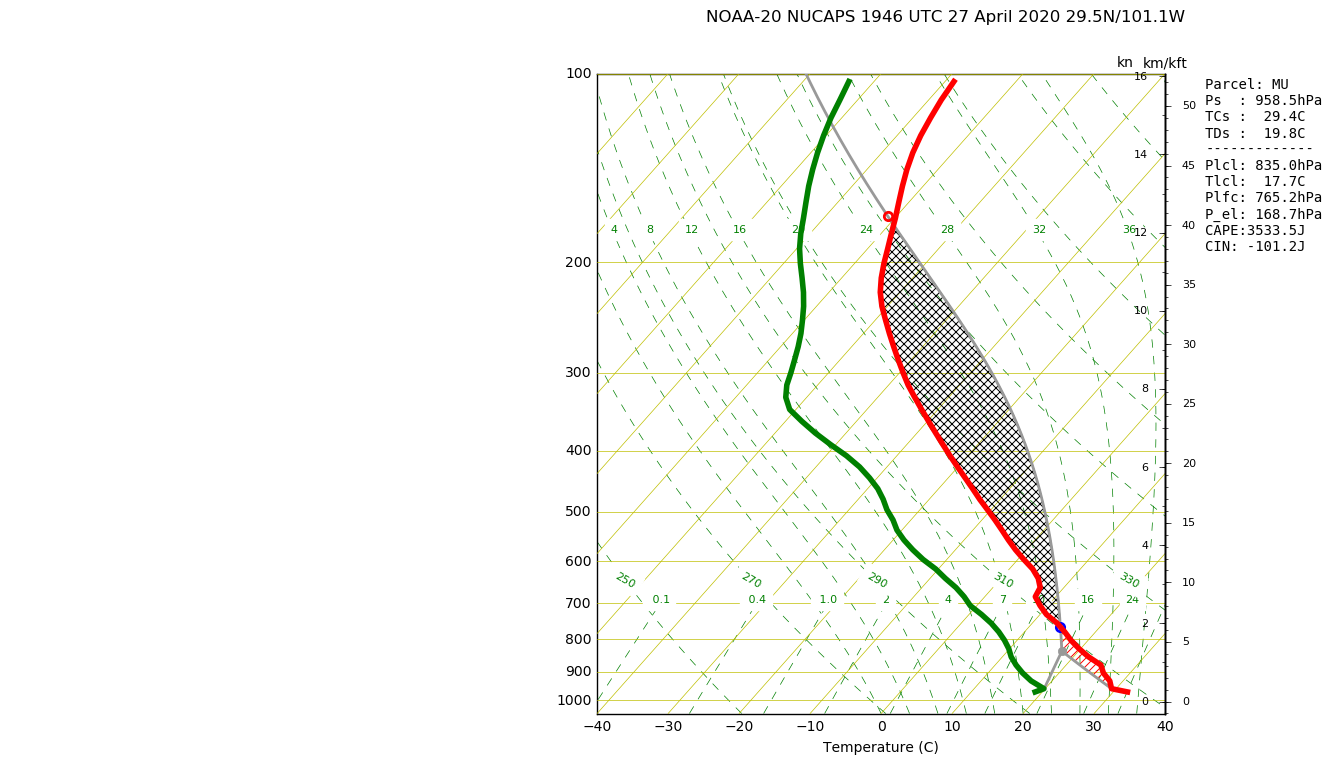


---- Lifted Parcel Quantities ----
Parcel: SB
Ps  : 970.0hPa
TCs :  32.0C
TDs :  19.0C
-------------
Plcl: 803.9hPa
Tlcl:  16.1C
Plfc: 760.8hPa
P_el: 171.7hPa
CAPE:3325.0J
CIN:  -52.2J
(970.0, 32.0, 19.0, 'sb')
('CAPE = ', 3324.9937553782561)
Figure saved


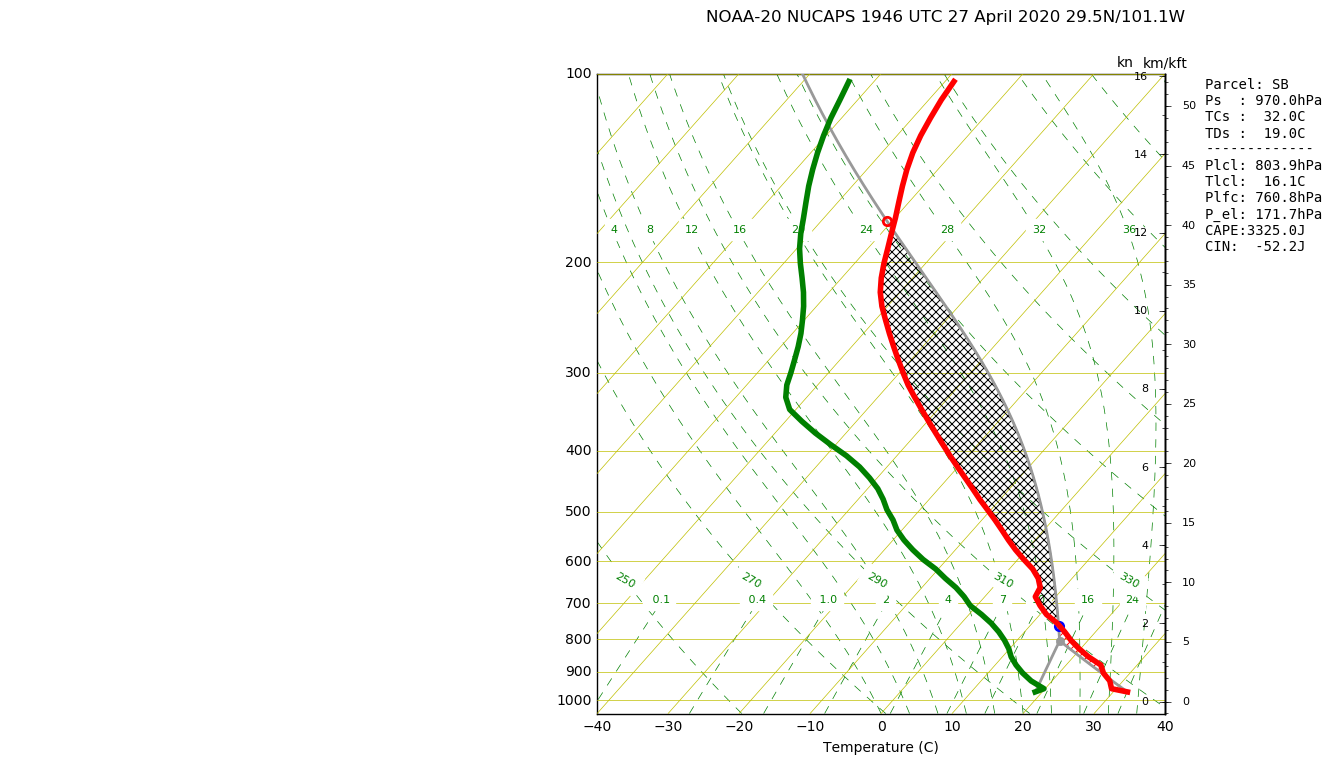

('Z_UP = ', array([ 3.]))
('P_UP = ', array([ 706.5]))
('T_UP = ', array([ 282.0625]))
('TD_UP = ', array([ 272.2261]))
('Z_LO = ', array([ 0.3]))
('P_LO = ', array([ 970.]))
('T_LO = ', array([ 305.15]))
('TD_LO = ', array([ 292.15]))
('DD_UP = ', array([ 9.8364]))
('DD_LO = ', array([ 13.]))
('DDD = ', array([ 3.1636]))
('Gamma = ', array([ 8.55092593]))
('MWPI_IRv1 = ', array([ 47.04933574]))
('WGP_IR = ', array([ 50.19056256]))
('MWPI_IRv2 = ', array([ 5.87638617]))
('WGP_IRv2 = ', array([ 53.66990039]))
('T_UP_mid = ', array([ 8.9125]))
('T_LO_mid = ', array([ 32.]))
('TD_LO_mid = ', array([ 292.15]))
('Tdiff = ', array([ 23.0875]))
('DD_LO = ', array([-260.15]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', array([ 23.0875]))
('DD_LO = ', array([ 13.]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', array([ 23.0875]))
('DD_LO = ', array([-260.15]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Haines Index MID = ', 4)
('Haines Index HIGH = ', 4)
('C-Haines Index = ', 4)

--

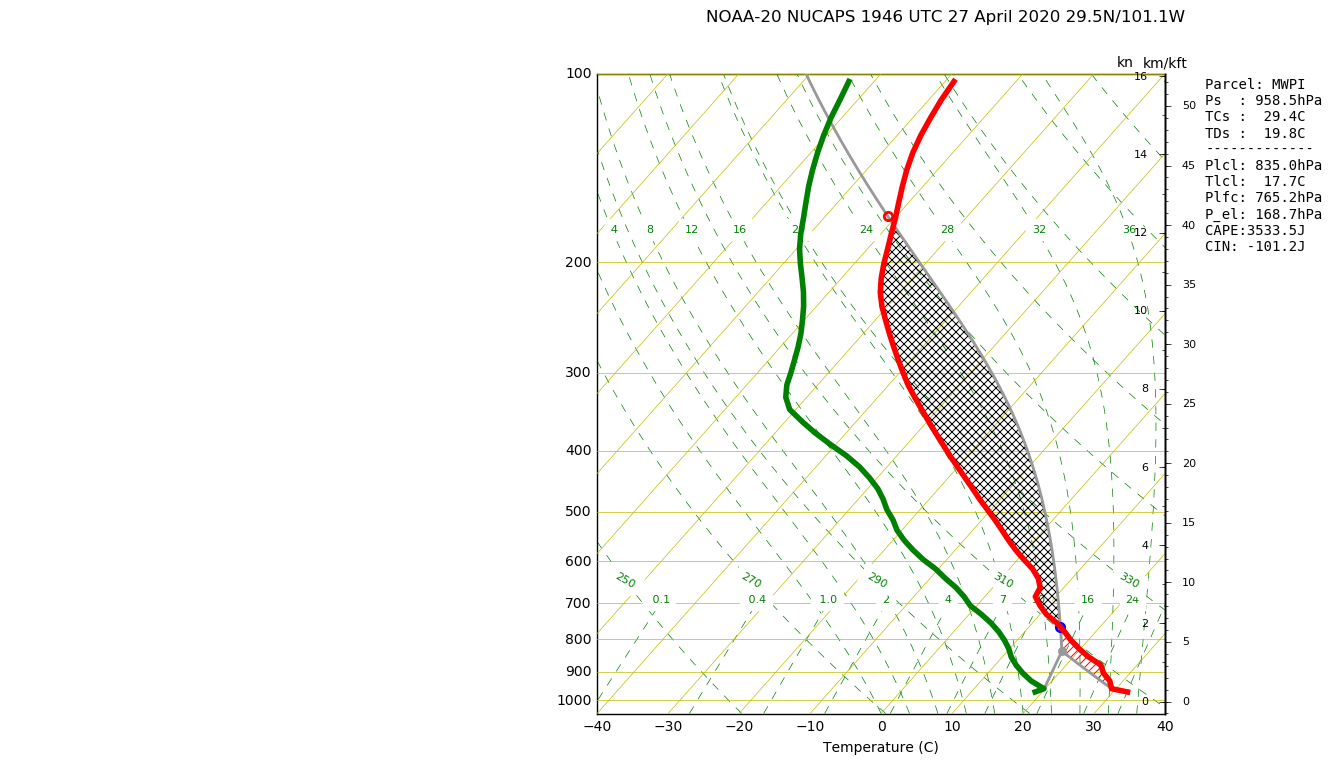


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 958.5hPa
TCs :  29.4C
TDs :  19.8C
-------------
Plcl: 835.0hPa
Tlcl:  17.7C
Plfc: 765.2hPa
P_el: 168.7hPa
CAPE:3533.5J
CIN: -101.2J
Figure saved


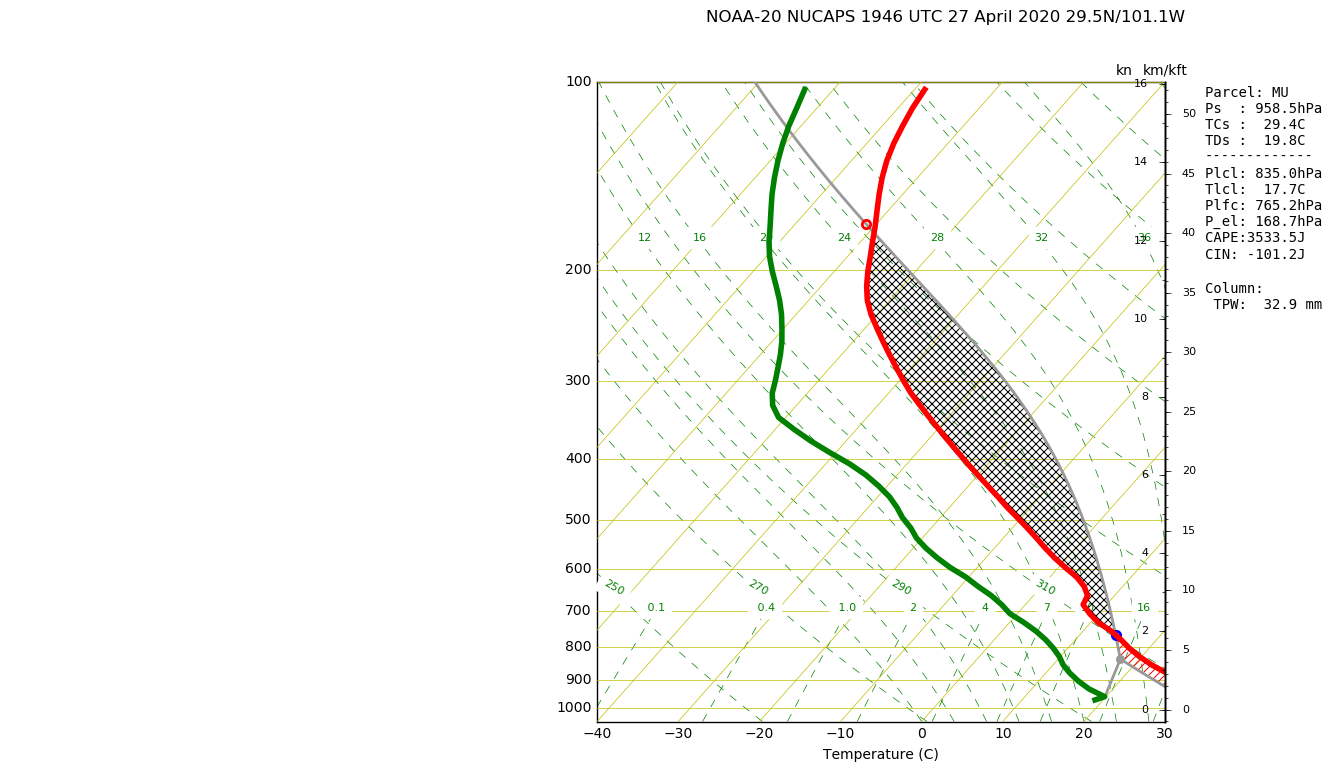

In [4]:
idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 970.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)

S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE_mu,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE_mu)
fig.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W')
plt.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W',size=12)
plt.savefig("skewt_nucaps_0427_1946_mu_mod.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='sb')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE_sb,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE_sb)
fig.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W')
plt.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W',size=12)
plt.savefig("skewt_nucaps_0427_1946_sb_mod.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
Z_UP = height_km[idx_pup]
print("Z_UP = ", Z_UP)
P_UP = press[idx_pup]
print("P_UP = ", P_UP)
T_UP = temp[idx_pup]
print("T_UP = ", T_UP)
TD_UP = dewpt[idx_pup]
print("TD_UP = ", TD_UP)
Z_LO = height_km[idx_plo]
print("Z_LO = ", Z_LO)
P_LO = press[idx_plo]
print("P_LO = ", P_LO)
T_LO = temp[idx_plo]
print("T_LO = ", T_LO)
TD_LO = dewpt[idx_plo]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE_mu)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(press == 706.5)
idx_plo_mid = np.where(press == 970.0)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpt[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[1]
dewpt_p2 = dewpoint_c[1]

fig = plt.figure(figsize=(8, 8))
parcel_2=(958.5, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel_2)
print("CAPE = ",CAPE)
fig.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W')
plt.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W',size=12)
plt.savefig("skewt_mwpi_nucaps_0427_1946_mod.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W')
plt.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_nucaps_1946_mod.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

In [7]:
import matplotlib.pyplot as plt
from skewt import SkewT
from six import StringIO
import numpy as np
import re

'''
Modified NOAA-20 NUCAPS Profile at 1946 UTC 27 April 2020 at position 29.5N/101.1W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 7 0 . 0"
temp = "2 0 8 . 6 4 0 6 2   2 1 6 . 6 8 7 5   2 2 5 . 2 0 3 1 2   2 3 2 . 8 4 3 7 5   2 3 8 . 8 9 0 6 2   2 4 7 . 2 3 4 3 8   2 5 6 . 1 0 9 3 8   2 6 2 . 5 7 8 1 2   2 6 5 . 5 4 6 8 8   2 6 5 . 9 2 1 8 8   2 6 2 . 9 2 1 8 8   2 5 9 . 4 2 1 8 8   2 5 5 . 7 6 5 6 2   2 5 1 . 9 5 3 1 2   2 4 7 . 7 9 6 8 8   2 4 3 . 0 7 8 1 2   2 3 8 . 6 7 1 8 8   2 3 4 . 4 8 4 3 8   2 3 0 . 9 6 8 7 5   2 2 8 . 5 6 2 5   2 2 6 . 6 4 0 6 2   2 2 5 . 0 6 2 5   2 2 3 . 7 8 1 2 5   2 2 2 . 7 8 1 2 5   2 2 1 . 8 5 9 3 8   2 2 1 . 1 0 9 3 8   2 2 0 . 0 4 6 8 8   2 1 8 . 8 5 9 3 8   2 1 7 . 7 5   2 1 6 . 7 8 1 2 5   2 1 5 . 8 2 8 1 2   2 1 4 . 8 5 9 3 8   2 1 3 . 8 1 2 5   2 1 2 . 6 0 9 3 8   2 1 1 . 3 1 2 5   2 0 9 . 7 6 5 6 2   2 0 8 . 2 9 6 8 8   2 0 7 . 0 6 2 5   2 0 6 . 1 2 5   2 0 5 . 6 5 6 2 5   2 0 5 . 0 9 3 7 5   2 0 4 . 4 3 7 5   2 0 4 . 2 5   2 0 4 . 4 0 6 2 5   2 0 4 . 9 2 1 8 8   2 0 5 . 6 5 6 2 5   2 0 6 . 4 8 4 3 8   2 0 7 . 5 1 5 6 2   2 0 8 . 7 8 1 2 5   2 1 0 . 2 1 8 7 5   2 1 1 . 7 1 8 7 5   2 1 3 . 2 1 8 7 5   2 1 4 . 5 9 3 7 5   2 1 5 . 9 6 8 7 5   2 1 7 . 2 8 1 2 5   2 1 8 . 7 3 4 3 8   2 2 0 . 3 7 5   2 2 2 . 3 5 9 3 8   2 2 4 . 5 9 3 7 5   2 2 6 . 8 1 2 5   2 2 9 . 0 7 8 1 2   2 3 1 . 3 2 8 1 2   2 3 3 . 6 0 9 3 8   2 3 5 . 8 9 0 6 2   2 3 8 . 3 5 9 3 8   2 4 0 . 8 4 3 7 5   2 4 3 . 3 1 2 5   2 4 5 . 7 8 1 2 5   2 4 8 . 2 1 8 7 5   2 5 0 . 6 4 0 6 2   2 5 3 . 0 9 3 7 5   2 5 5 . 5 3 1 2 5   2 5 7 . 9 3 7 5   2 6 0 . 2 5   2 6 2 . 6 5 6 2 5   2 6 5 . 0   2 6 7 . 2 3 4 3 8   2 6 9 . 3 9 0 6 2   2 7 1 . 6 2 5   2 7 4 . 0   2 7 6 . 4 3 7 5   2 7 8 . 3 9 0 6 2   2 7 9 . 8 1 2 5   2 8 0 . 2 6 5 6 2   2 8 2 . 0 6 2 5   2 8 4 . 0 6 2 5   2 8 6 . 6 5 6 2 5   2 8 8 . 7 8 1 2 5   2 9 0 . 7 3 4 3 8   2 9 2 . 9 0 6 2 5   2 9 5 . 2 8 1 2 5   2 9 8 . 0 3 1 2 5   2 9 9 . 3 9 0 6 2   3 0 1 . 2 8 1 2 5   3 0 2 . 5   3 0 5 . 1 5"
dewpt = "1 4 8 . 9 2 6 5 4   1 5 3 . 9 5 6 6 2   1 5 7 . 0 6 6 8 3   1 5 9 . 7 1 5 7   1 6 2 . 0 7 7 9 4   1 6 4 . 1 4 4 6 7   1 6 5 . 8 8 6 3   1 6 7 . 3 3 2 4 3   1 6 8 . 6 9 1 8 6   1 6 9 . 8 7 7 8 2   1 7 1 . 0 0 7 2 5   1 7 2 . 0 8 2 1 4   1 7 3 . 0 7 0 8 3   1 7 3 . 9 9 4 6 6   1 7 4 . 8 6 3 4 3   1 7 5 . 7 1 1 1 7   1 7 6 . 5 7 3 7 2   1 7 7 . 4 0 8 7 8   1 7 8 . 2 7 3 6   1 7 9 . 1 0 8 9 3   1 7 9 . 8 8 1 1 8   1 8 0 . 6 0 2 7   1 8 1 . 3 0 1 0 4   1 8 1 . 9 7 0 2 8   1 8 2 . 6 1 1   1 8 3 . 2 3 6 2 5   1 8 3 . 8 3 0 1 7   1 8 4 . 3 8 8 8 7   1 8 4 . 9 4 0 8 6   1 8 5 . 4 5 2 9 4   1 8 5 . 8 5 3 5   1 8 6 . 2 4 7 7 1   1 8 6 . 6 2 8 7 1   1 8 6 . 9 7 9 1   1 8 7 . 2 3 3 1 1   1 8 7 . 4 8 4 2 5   1 8 7 . 7 2 1 3 1   1 8 7 . 9 5 4 5 6   1 8 8 . 1 7 2 5 5   1 8 8 . 3 9 3 0 2   1 8 8 . 6 1 4 7 8   1 8 8 . 8 2 6 4 9   1 8 9 . 0 3 3 7 4   1 8 9 . 6 0 5 1 5   1 9 0 . 6 4 6 9 1   1 9 1 . 6 2 8 2 2   1 9 2 . 8 0 3 2 8   1 9 4 . 1 0 2 3 9   1 9 5 . 5 1 0 3 6   1 9 7 . 0 1 6 3 7   1 9 8 . 6 4 4 4 5   2 0 0 . 2 7 1 1   2 0 1 . 8 3 1 2 7   2 0 3 . 5 5 4 2 4   2 0 5 . 5 0 9 8 1   2 0 7 . 5 8 2 3 4   2 0 9 . 5 6 1 2 6   2 1 1 . 3 3 3 0 8   2 1 2 . 8 9 3 2   2 1 4 . 3 5 0 1 6   2 1 5 . 6 2 2 3   2 1 6 . 7 4 0 7 2   2 1 7 . 8 2 6 3 9   2 1 8 . 8 0 5 7 4   2 2 0 . 1 9 4 1 4   2 2 2 . 2 6 2 5   2 2 5 . 4 5 9 1   2 2 8 . 8 2 1 7 5   2 3 2 . 3 9 0 2 7   2 3 6 . 0 6 5 5 5   2 3 9 . 2 9 6 9 5   2 4 2 . 0 6 4 3 8   2 4 4 . 5 7 7 2 7   2 4 6 . 6 5 3 8 1   2 4 8 . 4 9 3 4 2   2 5 0 . 6 3 4 1 4   2 5 2 . 4 5 0 9 9   2 5 4 . 6 7 9 3 4   2 5 7 . 1 5 7 1 4   2 5 9 . 8 1 5 6 4   2 6 2 . 7 7 4 8   2 6 5 . 3 0 0 7 2   2 6 7 . 9 5 1 0 2   2 7 0 . 2 3 5 9 6   2 7 2 . 2 2 6 1   2 7 4 . 9 1 7 0 2   2 7 7 . 3 6 9 7 5   2 7 9 . 4 9 7 6   2 8 1 . 3 6 8 8 4   2 8 3 . 0 1 6 0 5   2 8 4 . 3 8 6 0 2   2 8 6 . 0 8 7 9 8   2 8 8 . 0 1 3 5 8   2 9 0 . 2 0 1 7 2   2 9 2 . 9 8 7 1   2 9 2 . 1 5"

print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.3
0.5
0.75
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 970.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = tempvirt[idx_plo]
T_top = tempvirt[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 2700
delta_zkm = 2.7
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,tempvirt_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

('PUP idx = ', (array([11]),))
('PLO idx = ', (array([0]),))

---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 958.5hPa
TCs :  33.6C
TDs :  19.8C
-------------
Plcl: 786.0hPa
Tlcl:  16.7C
Plfc: 759.3hPa
P_el: 154.4hPa
CAPE:4438.4J
CIN:  -50.2J
(958.5, 33.613760508122709, 19.837100000000021, 'mu')
('CAPE = ', 4438.4123439866735)
Figure saved


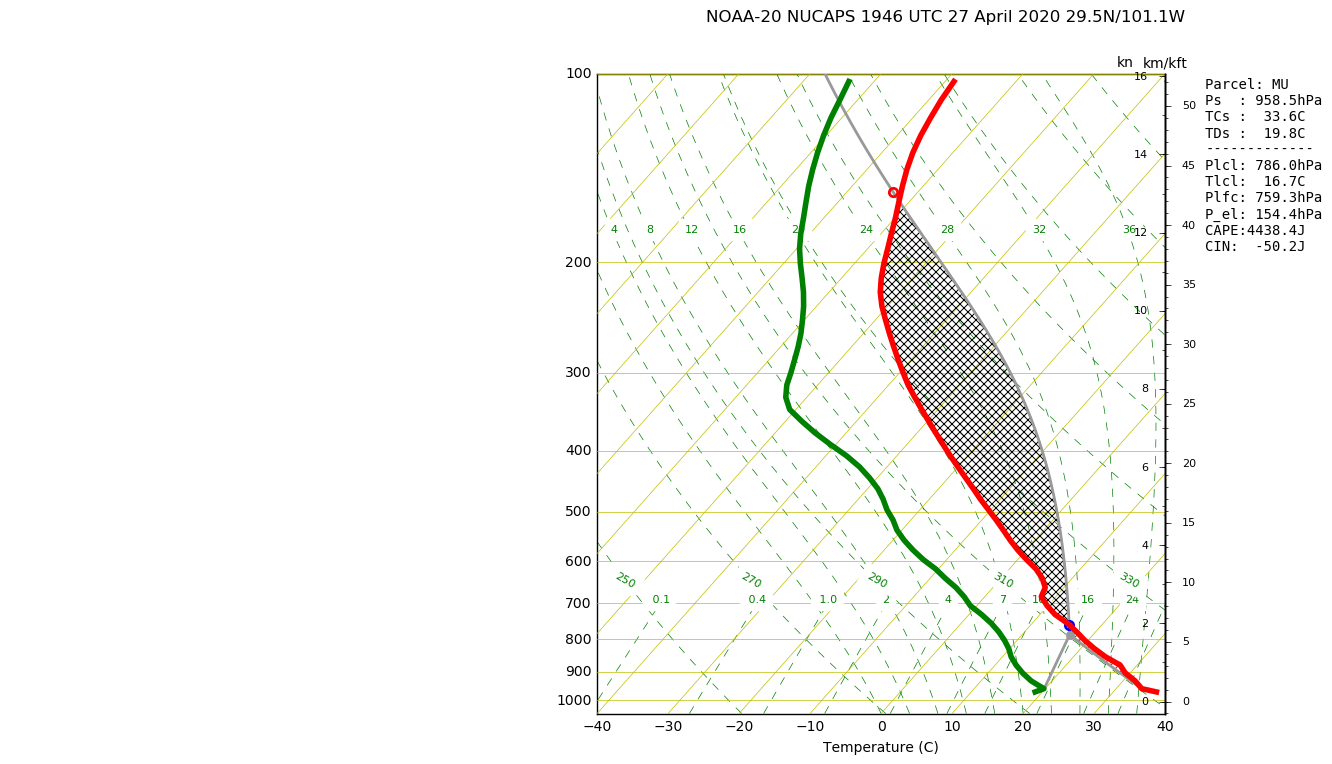


---- Lifted Parcel Quantities ----
Parcel: SB
Ps  : 970.0hPa
TCs :  36.1C
TDs :  19.0C
-------------
Plcl: 759.1hPa
Tlcl:  15.2C
Plfc: 754.0hPa
P_el: 158.0hPa
CAPE:4171.1J
CIN:   -3.0J
(970.0, 36.083260907727379, 19.0, 'sb')
('CAPE = ', 4171.1024146833724)
Figure saved


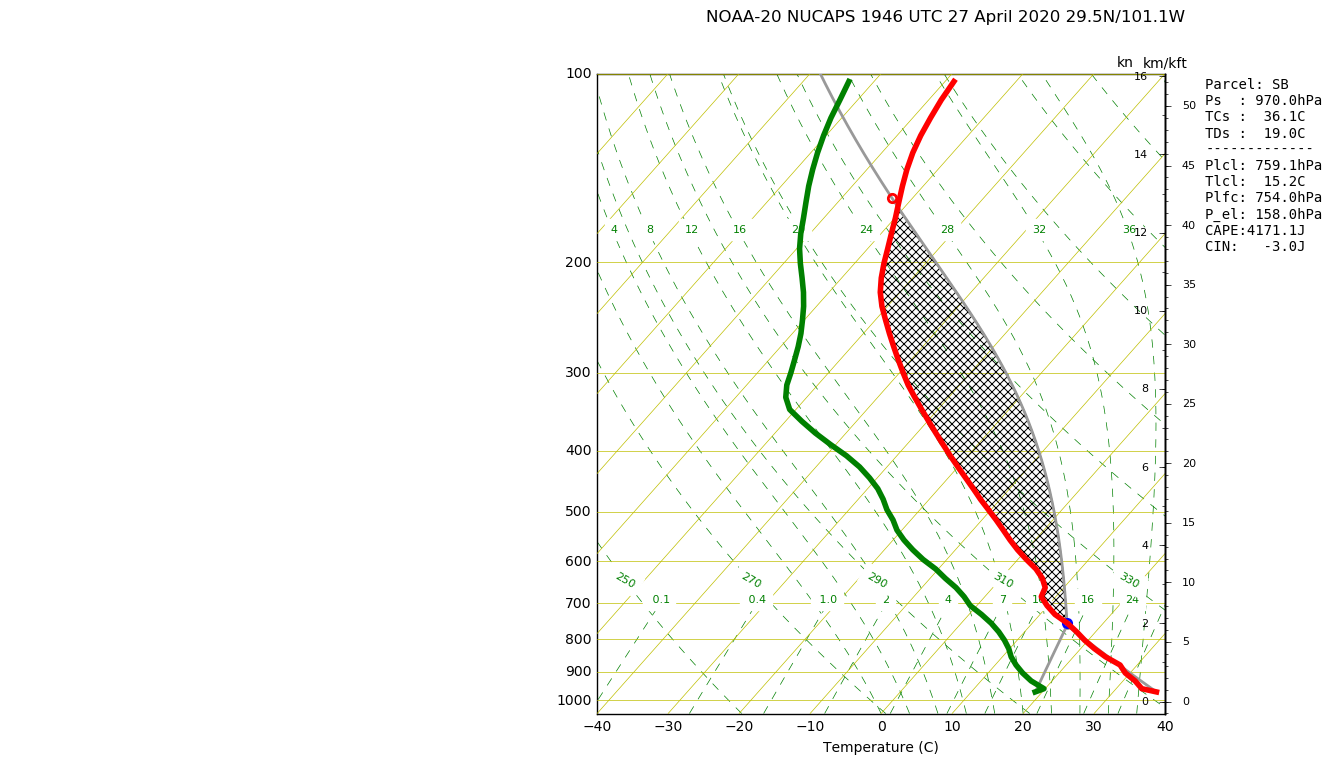

('Z_UP = ', array([ 3.]))
('P_UP = ', array([ 706.5]))
('T_UP = ', array([ 283.04526891]))
('TD_UP = ', array([ 272.2261]))
('Z_LO = ', array([ 0.3]))
('P_LO = ', array([ 970.]))
('T_LO = ', array([ 309.23326091]))
('TD_LO = ', array([ 292.15]))
('DD_UP = ', array([ 10.81916891]))
('DD_LO = ', array([ 17.08326091]))
('DDD = ', array([ 6.264092]))
('Gamma = ', array([ 9.6992563]))
('MWPI_IRv1 = ', array([ 60.34747174]))
('WGP_IR = ', array([ 56.24520388]))
('MWPI_IRv2 = ', array([ 7.631082]))
('WGP_IRv2 = ', array([ 64.34267336]))
('T_UP_mid = ', array([ 8.9125]))
('T_LO_mid = ', array([ 32.]))
('TD_LO_mid = ', array([ 292.15]))
('Tdiff = ', array([ 23.0875]))
('DD_LO = ', array([-260.15]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', array([ 26.187992]))
('DD_LO = ', array([ 17.08326091]))
('ST = ', 3)
('MT = ', 2)
('HI = ', 5)
('Tdiff = ', array([ 23.0875]))
('DD_LO = ', array([-260.15]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Haines Index MID = ', 4)
('Haines Index HIGH = ',

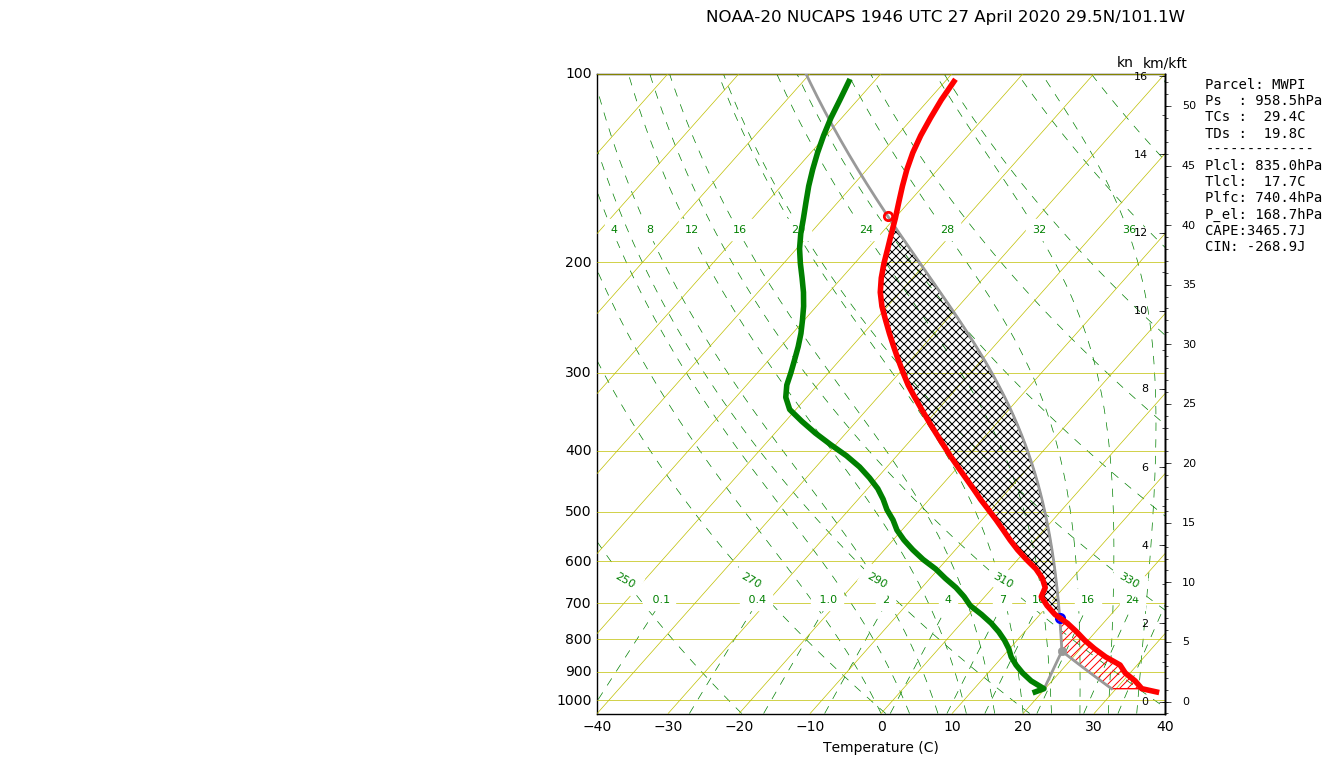


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 958.5hPa
TCs :  33.6C
TDs :  19.8C
-------------
Plcl: 786.0hPa
Tlcl:  16.7C
Plfc: 759.3hPa
P_el: 154.4hPa
CAPE:4438.4J
CIN:  -50.2J
Figure saved


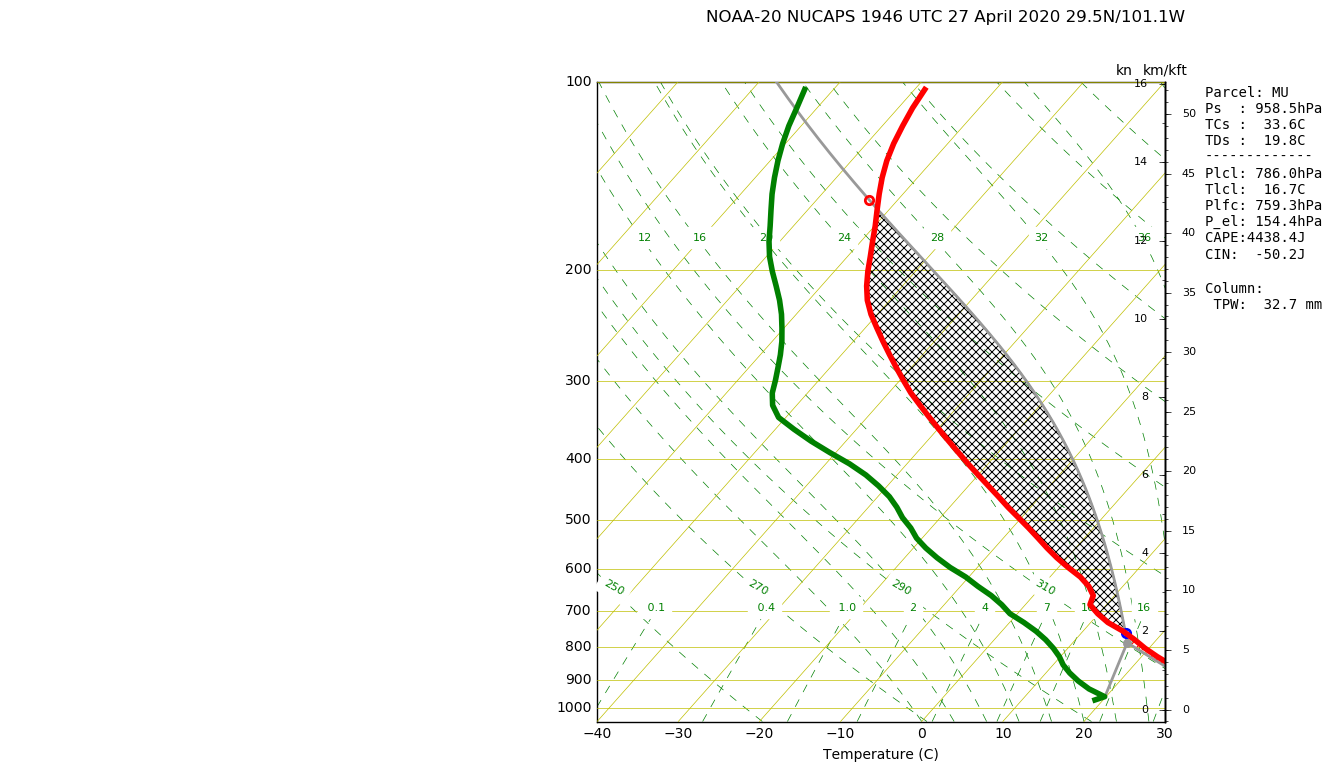

In [8]:
idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 970.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)

S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE_mu,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE_mu)
fig.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W')
plt.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W',size=12)
plt.savefig("skewt_nucaps_tv_0427_1946_mu_mod.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='sb')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE_sb,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE_sb)
fig.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W')
plt.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W',size=12)
plt.savefig("skewt_nucaps_tv_0427_1946_sb_mod.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
Z_UP = height_km[idx_pup]
print("Z_UP = ", Z_UP)
P_UP = press[idx_pup]
print("P_UP = ", P_UP)
T_UP = tempvirt[idx_pup]
print("T_UP = ", T_UP)
TD_UP = dewpt[idx_pup]
print("TD_UP = ", TD_UP)
Z_LO = height_km[idx_plo]
print("Z_LO = ", Z_LO)
P_LO = press[idx_plo]
print("P_LO = ", P_LO)
T_LO = tempvirt[idx_plo]
print("T_LO = ", T_LO)
TD_LO = dewpt[idx_plo]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE_mu)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(press == 706.5)
idx_plo_mid = np.where(press == 970.0)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpt[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[1]
dewpt_p2 = dewpoint_c[1]

fig = plt.figure(figsize=(8, 8))
parcel_2=(958.5, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel_2)
print("CAPE = ",CAPE)
fig.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W')
plt.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W',size=12)
plt.savefig("skewt_mwpi_nucaps_tv_0427_1946_mod.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W')
plt.suptitle('NOAA-20 NUCAPS 1946 UTC 27 April 2020 29.5N/101.1W',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_nucaps_tv_1946_mod.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()